# Random Forest

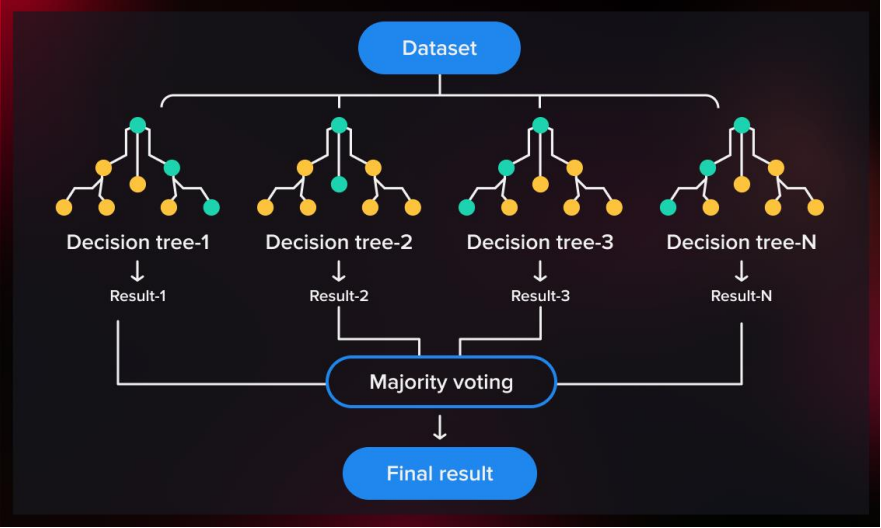

In [117]:
from warnings import filterwarnings
filterwarnings('ignore')

In [118]:
import pandas as pd
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [120]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [121]:
df.duplicated().sum()

0

In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [123]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [124]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

<Axes: title={'center': 'Drug count value'}, xlabel='Drug'>

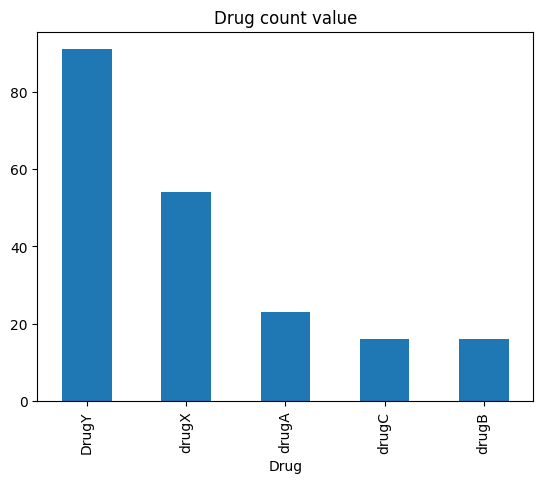

In [125]:
df['Drug'].value_counts().plot(kind='bar',title='Drug count value')

## Seperate X and Y

In [126]:
X = df.drop(columns=['Drug'])
Y = df[['Drug']]

In [127]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [128]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


## Seperate cat and con features on X

In [129]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [130]:
cat

['Sex', 'BP', 'Cholesterol']

In [131]:
con

['Age', 'Na_to_K']

## Preprocessing on X features

In [132]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [133]:
# Numerical_pipeline
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])
# Categorical_pipeline
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore'))])
# column Transformation
pre = ColumnTransformer([('num',num_pipe,con),('cat',cat_pipe,cat)])

In [134]:
X_pre = pre.fit_transform(X)
X_pre

array([[-1.29159102,  1.28652212,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.4151454 ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.82855818,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.46567567, -0.85908883,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [-1.29159102, -0.28650033,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.26146916, -0.6571702 ,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [135]:
cols = pre.get_feature_names_out()
cols

array(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M',
       'cat__BP_HIGH', 'cat__BP_LOW', 'cat__BP_NORMAL',
       'cat__Cholesterol_HIGH', 'cat__Cholesterol_NORMAL'], dtype=object)

In [136]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0


## Train Test Split

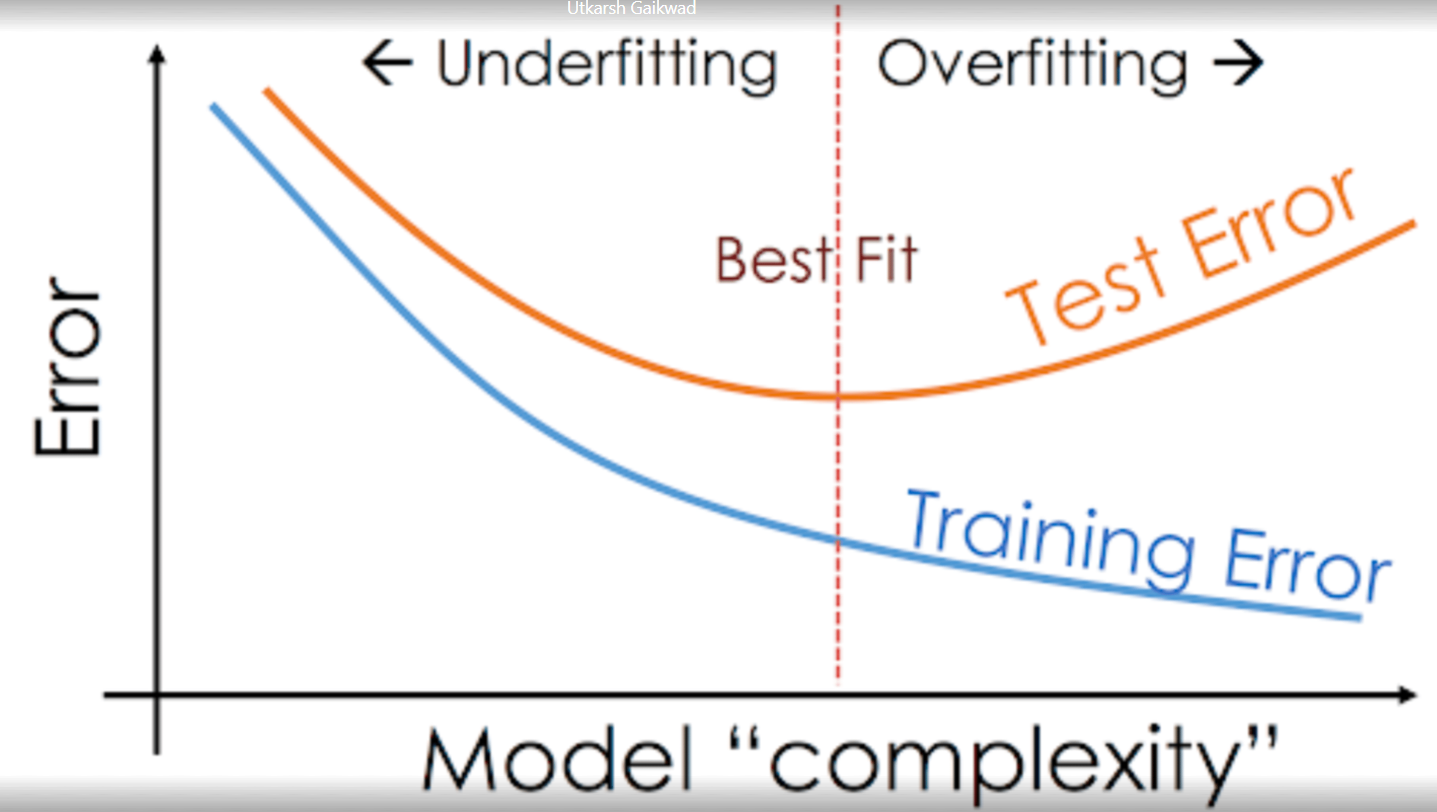

In [137]:

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.3, random_state=42)

In [138]:
xtrain.shape

(140, 9)

In [139]:
xtest.shape

(60, 9)

In [140]:
ytrain.value_counts()

Drug 
DrugY    65
drugX    36
drugA    16
drugB    13
drugC    10
Name: count, dtype: int64

In [141]:
ytest.value_counts()

Drug 
DrugY    26
drugX    18
drugA     7
drugC     6
drugB     3
Name: count, dtype: int64

## Create Random forest algorithm

In [142]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=2, max_depth=1, min_samples_split=3, min_samples_leaf=5, criterion='gini')
model.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=3,
                       n_estimators=2)

### check model accuracy

In [143]:
model.score(xtrain, ytrain)

0.7214285714285714

In [144]:
model.score(xtest, ytest)

0.7333333333333333

## Randomize SearchCv

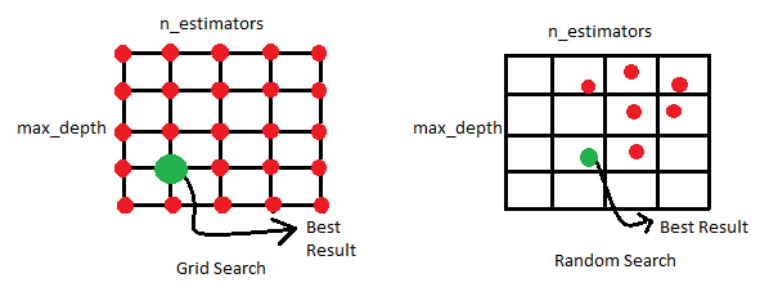

In [145]:
params = {'n_estimators':[20, 30, 40, 50, 100, 150, 200],
          'max_depth':[3, 4, 5, 6, 7, 8],
          'min_samples_split':[5, 6, 7, 8, 9],
          'criterion':['gini','entropy']}

In [146]:
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
rscv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, scoring='f1_macro')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_samples_split': [5, 6, 7, 8, 9],
                                        'n_estimators': [20, 30, 40, 50, 100,
                                                         150, 200]},
                   scoring='f1_macro')

In [147]:
rscv.best_params_

{'n_estimators': 20,
 'min_samples_split': 7,
 'max_depth': 5,
 'criterion': 'entropy'}

In [148]:
rscv.best_score_

0.9862857142857143

In [149]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=7,
                       n_estimators=20)

In [150]:
best_rfc.score(xtrain,ytrain)

1.0

In [151]:
best_rfc.score(xtest, ytest)

1.0

### Predict train test Results

In [152]:
ypred_tr = best_rfc.predict(xtrain)
ypred_ts = best_rfc.predict(xtest)

In [153]:
ypred_tr[0:5]

array(['drugA', 'DrugY', 'drugB', 'DrugY', 'drugX'], dtype=object)

In [154]:
ytrain.head()

,Drug
169,drugA
97,DrugY
31,drugB
12,DrugY
35,drugX


In [155]:
ypred_ts[0:5]

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY'], dtype=object)

In [156]:
ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


In [157]:
best_rfc.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

## Plot The Confusion Matrix

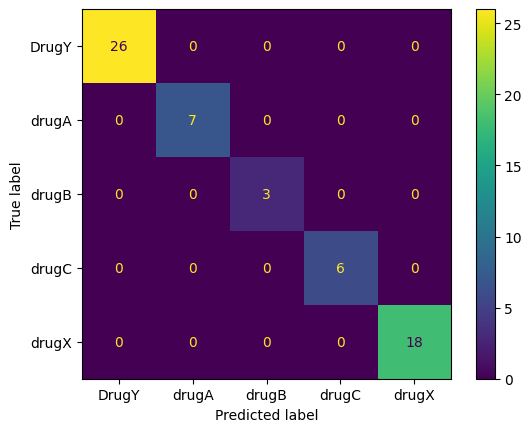

In [158]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=list(best_rfc.classes_))
cfd.plot()

## Classification Report

In [159]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        26
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



## cross validate accuracy

In [160]:
from sklearn.model_selection import cross_val_score
accuracy_scores = cross_val_score(best_rfc, xtrain, ytrain, scoring='accuracy', cv=5)
accuracy_scores

array([1.        , 1.        , 1.        , 0.96428571, 1.        ])

In [161]:
accuracy_scores.mean()

0.9928571428571429

In [162]:
f1_scores = cross_val_score(best_rfc, xtrain, ytrain, cv=5, scoring='f1_macro')
f1_scores

array([1.        , 1.        , 0.86666667, 0.93142857, 1.        ])

In [163]:
f1_scores.mean()

0.9596190476190476

In [164]:
precision_scores = cross_val_score(best_rfc, xtrain, ytrain, cv=5, scoring='precision_macro')
precision_scores

array([1.   , 0.975, 1.   , 1.   , 1.   ])

In [165]:
precision_scores.mean()

0.9949999999999999

In [166]:
recall_scores = cross_val_score(best_rfc, xtrain, ytrain, cv=5, scoring='recall_macro')
recall_scores

array([1.        , 1.        , 1.        , 0.93333333, 1.        ])

In [167]:
recall_scores.mean()

0.9866666666666667

## Get features importances

In [168]:
imp = best_rfc.feature_importances_
imp

array([0.11416814, 0.49601627, 0.0026083 , 0.00319461, 0.19096646,
       0.05597734, 0.08298907, 0.02215936, 0.03192045])

In [169]:
xtrain.columns

Index(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M', 'cat__BP_HIGH',
       'cat__BP_LOW', 'cat__BP_NORMAL', 'cat__Cholesterol_HIGH',
       'cat__Cholesterol_NORMAL'],
      dtype='object')

In [170]:
imp = pd.Series(imp)
imp.index = xtrain.columns
imp = imp.sort_values(ascending=False)
imp

num__Na_to_K               0.496016
cat__BP_HIGH               0.190966
num__Age                   0.114168
cat__BP_NORMAL             0.082989
cat__BP_LOW                0.055977
cat__Cholesterol_NORMAL    0.031920
cat__Cholesterol_HIGH      0.022159
cat__Sex_M                 0.003195
cat__Sex_F                 0.002608
dtype: float64

<Axes: title={'center': 'Importance Plot'}>

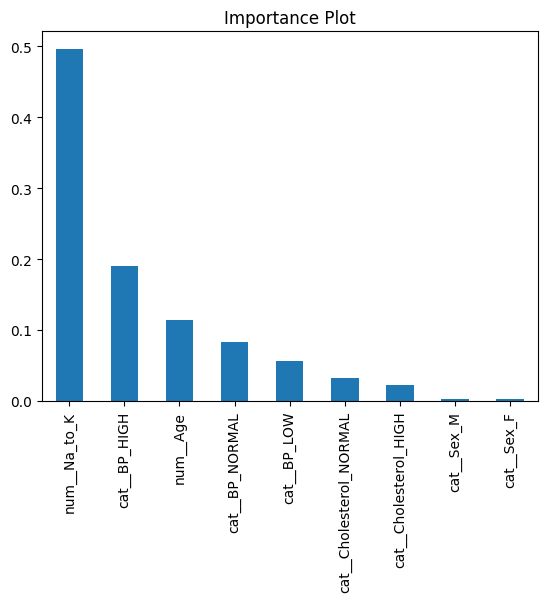

In [171]:
imp.plot(kind='bar', title='Importance Plot')